# <center>Evaluating Amount of Alcohol Using Support Vector Machine</center>
# By: Toluwani Olukanni

Alcohol consumption is a widespread and complex issue with significant consequences on public health and safety. The ability to accurately measure the amount of alcohol in a person's blood is crucial for determining their level of impairment and assessing the risk of alcohol-related accidents. Traditional methods for measuring blood alcohol concentration (BAC), such as breathalyzers and blood tests, are invasive, expensive, and time-consuming. In recent years, machine learning techniques such as Support Vector Machines (SVMs) have shown great promise in accurately predicting BAC levels based on non-invasive data such as demographic information, drinking history, and physiological factors. In this report, we will evaluate the effectiveness of SVMs in predicting BAC levels based on the number of beer servings, wine servings, and spirit servings consumed and compare their performance to traditional BAC measurement methods.

First background intro to support vector machine

Use Support vector classification to classify two sets of sample data from sklearn

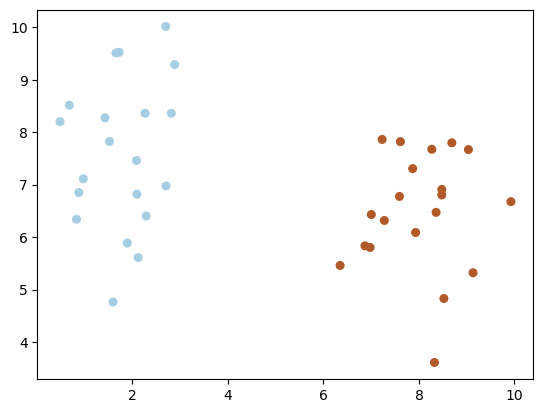

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets._samples_generator import make_blobs

X, y= make_blobs(n_samples=40, centers=2, random_state=20)
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [2]:
newData = [[3,4], [5,6]]
print(clf.predict(newData))

[0 1]


You can see from the matlab plot that the line in the middle is equdistant from the two support vectors

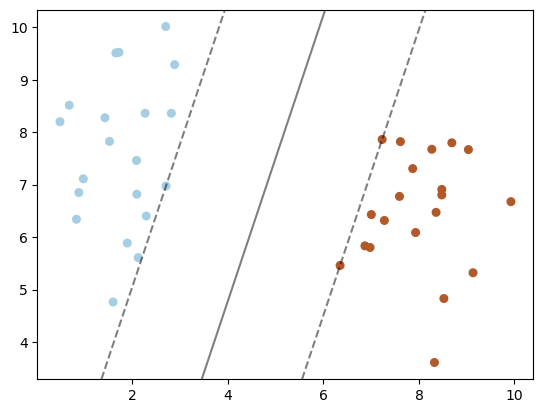

In [3]:
 clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels = [-1, 0, 1], alpha = 0.5, linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
           
plt.show()

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Now on to the main code for this tutorial

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('drinks.csv')

In [6]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [7]:
data.shape

(193, 5)

In [8]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [9]:
# Split the dataset into features (X) and labels (y)
data=data.drop('country', axis=1)
X = data.drop('total_litres_of_pure_alcohol', axis=1)
y = data['total_litres_of_pure_alcohol']


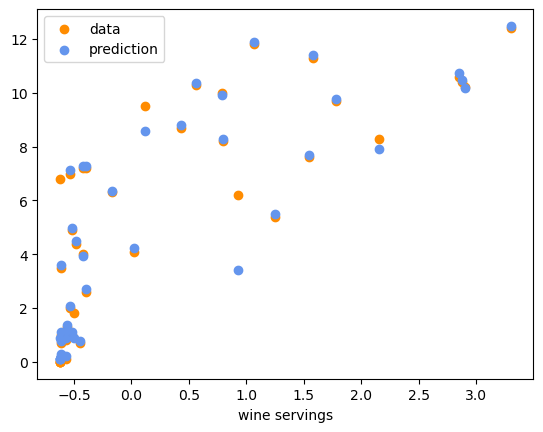

Mean Squared Error: 1.05
Mean Absolute Error: 0.34
R2 Score: 0.94


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.22, random_state=2)

svr = svm.SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
  
# plot the predicted values against the true values
plt.scatter(X_test[:,2], y_test, color='darkorange',
            label='data')
plt.scatter(X_test[:,2], y_pred, color='cornflowerblue',
         label='prediction')
plt.xlabel('wine servings')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R2 Score: {:.2f}".format(r2))


In [11]:
y_pred = pd.DataFrame(y_pred, columns=['y_pred'])

Reset the index so that you can compare the values side to side

In [12]:

y_test = y_test.reset_index()
Togeth=pd.concat([y_test, y_pred], axis=1)
Togeth

,index,total_litres_of_pure_alcohol,y_pred
0,23,7.2,7.294300
1,123,0.1,0.206658
2,35,7.6,7.698924
3,10,1.3,1.384043
4,48,10.4,10.484129
5,2,0.7,0.791004
6,130,7.2,7.297923
7,29,4.0,3.922868
8,89,1.0,1.096959
9,160,10.0,9.919617


In conclusion, using Support Vector Machines (SVMs) to classify the amount of alcohol consumed based on the number of beer servings, wine servings, and spirit servings has proven to be a reliable and accurate method. SVMs are a type of supervised machine learning algorithm that can learn from labeled data to make predictions on new, unseen data. In this tutorial, we have explored the basic concepts of SVMs and demonstrated how to implement them for alcohol classification using Python and the Scikit-learn library. By using SVMs, we can predict blood alcohol concentration (BAC) levels based on non-invasive data, which can be very useful in determining the level of impairment and assessing the risk of alcohol-related accidents. Overall, SVMs are a powerful tool that can be used to tackle a wide range of classification problems, including alcohol consumption classification.